In [1]:
import matplotlib
from redbaron import redbaron
redbaron.ipython_behavior = False

import numpy as np
from scipy import signal
from pyha import common
from pyha.common.util import plot_freqz
from pyha import Sfix, simulate, hardware_sims_equal, sims_close
import os

# # add dev folder to path in order to import our module
# import os, sys
# module_path = os.path.abspath(os.path.join('..'))
# sys.path.append(module_path)
# from pyha_demo_project.complex_fir import ComplexFIR

# set 'run_as_baseline' to True and run 'Restart & Run all' before you commit this notebook, else you will get failed tests in CI.
# also consider running in virtualenvironment, tests may fail if, for example, matplotlib versions differ
# use False for experimenting with larger figures + run the GATE simulations
run_as_baseline = False
if not run_as_baseline:
    matplotlib.use('nbagg')
    import matplotlib.pyplot as plt
    from pylab import rcParams
    rcParams['figure.figsize'] = 10, 5
    %load_ext autoreload
    %autoreload 2
else:
    import matplotlib.pyplot as plt
    # this ignores some 'log' warnings that would fail the unit tests as they include system path
    import warnings
    warnings.filterwarnings('ignore')
# in Travis CI we cannot run GATE simulations, comment out to run GATE simulations locally
os.environ["PYHA_SKIP_GATE"] = '1'

# Design filter

<IPython.core.display.Javascript object>


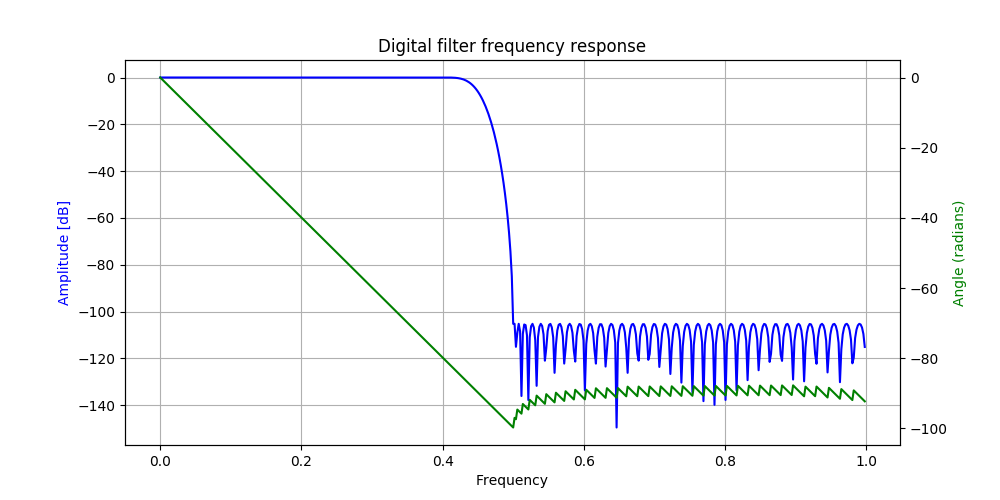

In [2]:
taps = signal.remez(128, [0, 0.2, 0.25, 0.5], [1, 0])
plot_freqz(taps)

# Diagram

![alt text](diagram.png "Title")

# Pyha model

In [3]:
from pyhacores.filter import FIR
from pyha import Hardware

class ComplexFIR(Hardware):
    """LOL"""
    def __init__(self, taps):
        # registers
        self.fir = [FIR(taps), 
#                     FIR(taps)
                   ]
        
        # constants (written in CAPS)
        self.TAPS = taps
        self.DELAY = self.fir[0].DELAY
    
    def main(self, x):
        """ Apply FIR filter to 'real' and 'imag' channels """
        out = x
        out.real = self.fir[0].main(x.real)
#         out.imag = self.fir[1].main(x.imag)
        return out

    def model_main(self, x):
        """ Golden output """
        from scipy.signal import lfilter
        return lfilter(self.TAPS, [1.0], x)

# Evaluate frequency and phase response

In [4]:
# get imulse response of the filter
inp = [0.0 + 0.0j] * 512
inp[0] = 1.0 + 1.0j

In [5]:
dut = ComplexFIR(taps)
sims = simulate(dut, # pyha model
                inp, # input to the 'main' function
                simulations=['MODEL', 'PYHA', 'RTL', 'GATE']
               )

INFO:simulation:Running MODEL simulation!
INFO:simulation:Running PYHA simulation!
INFO:simulation:Converting complex inputs to ComplexSfix(left=0, right=-17)
INFO:simulation:Running RTL simulation!
INFO:simulation:Converting complex inputs to ComplexSfix(left=0, right=-17)
INFO:simulation:Running COCOTB & GHDL simulation....
INFO:simulation:Simulations completed!


In [6]:
import pandas as pd # for pretty printing
pd.DataFrame(sims)

,MODEL,PYHA,RTL
0,(5.98723154595e-06+5.98723154595e-06j),0j,0j
1,(3.94653493842e-06+3.94653493842e-06j),0j,0j
2,(-1.16914696356e-05-1.16914696356e-05j),(-1.52587890625e-05+0j),(-1.52587890625e-05+0j)
3,(-1.11244987e-05-1.11244987e-05j),(-7.62939453125e-06+0j),(-7.62939453125e-06+0j)
4,(1.60088696452e-05+1.60088696452e-05j),(7.62939453125e-06+0j),(7.62939453125e-06+0j)
5,(2.85895584662e-05+2.85895584662e-05j),(2.28881835938e-05+0j),(2.28881835938e-05+0j)
6,(-1.75175220734e-05-1.75175220734e-05j),(-1.52587890625e-05+0j),(-1.52587890625e-05+0j)
7,(-5.46997038127e-05-5.46997038127e-05j),(-5.34057617188e-05+0j),(-5.34057617188e-05+0j)
8,(6.18856752713e-06+6.18856752713e-06j),0j,0j
9,(9.08709788767e-05+9.08709788767e-05j),(8.39233398438e-05+0j),(8.39233398438e-05+0j)


In [7]:
assert hardware_sims_equal(sims)

INFO:simulation:sims_close(rtol=1e-16, atol=1e-16)
INFO:simulation:Using "PYHA" as golden output
INFO:simulation:PYHA OK!
INFO:simulation:RTL OK!


In [8]:
assert sims_close(sims)

INFO:simulation:sims_close(rtol=0.0001, atol=3.0517578125e-05)
INFO:simulation:Using "MODEL" as golden output
INFO:simulation:MODEL OK!
ERROR:conversion:PYHA(7) (-5.340576171875e-05+0j) != (-5.4699703812650466e-05-5.4699703812650466e-05j)
ERROR:conversion:PYHA(9) (8.392333984375e-05+0j) != (9.08709788766863e-05+9.08709788766863e-05j)
ERROR:conversion:PYHA(11) (-0.00012969970703125+0j) != (-0.00012939472672256978-0.00012939472672256978j)
ERROR:conversion:PYHA(12) (-9.1552734375e-05+0j) != (-8.809401038764795e-05-8.809401038764795e-05j)
ERROR:conversion:PYHA(13) (0.000152587890625+0j) != (0.00015870629742229734+0.00015870629742229734j)
ERROR:conversion:PYHA(14) (0.00018310546875+0j) != (0.00018833945381609426+0.00018833945381609426j)
ERROR:conversion:PYHA(15) (-0.00016021728515625+0j) != (-0.00015776839888634122-0.00015776839888634122j)
ERROR:conversion:PYHA(16) (-0.00032806396484375+0j) != (-0.0003267170031962315-0.0003267170031962315j)
ERROR:conversion:PYHA(17) (9.1552734375e-05+0j) !=

ERROR:conversion:PYHA(91) (0.0044097900390625+0j) != (0.004420629201910506+0.004420629201910506j)
ERROR:conversion:PYHA(92) (0.00225830078125+0j) != (0.0022694934356604387+0.0022694934356604387j)
ERROR:conversion:PYHA(93) (-0.0029449462890625+0j) != (-0.0029426961796754783-0.0029426961796754783j)
ERROR:conversion:PYHA(94) (-0.00266265869140625+0j) != (-0.002659416720609443-0.002659416720609443j)
ERROR:conversion:PYHA(95) (0.00160980224609375+0j) != (0.001620189627228695+0.001620189627228695j)
ERROR:conversion:PYHA(96) (0.0025787353515625+0j) != (0.00258294475469216+0.00258294475469216j)
ERROR:conversion:PYHA(97) (-0.00057220458984375+0j) != (-0.0005700385904523101-0.0005700385904523101j)
ERROR:conversion:PYHA(98) (-0.00220489501953125+0j) != (-0.0022075880745386247-0.0022075880745386247j)
ERROR:conversion:PYHA(99) (-0.00016021728515625+0j) != (-0.00016356512728305666-0.00016356512728305666j)
ERROR:conversion:PYHA(100) (0.001678466796875+0j) != (0.0016872322125150222+0.00168723221251502

ERROR:conversion:RTL(62) (0.1804962158203125+0j) != (0.18050222098859192+0.18050222098859192j)
ERROR:conversion:RTL(63) (0.413299560546875+0j) != (0.413306367964931+0.413306367964931j)
ERROR:conversion:RTL(64) (0.413299560546875+0j) != (0.413306367964931+0.413306367964931j)
ERROR:conversion:RTL(65) (0.1804962158203125+0j) != (0.18050222098859192+0.18050222098859192j)
ERROR:conversion:RTL(66) (-0.04834747314453125+0j) != (-0.04834996051362379-0.04834996051362379j)
ERROR:conversion:RTL(67) (-0.08724212646484375+0j) != (-0.0872398034485949-0.0872398034485949j)
ERROR:conversion:RTL(68) (0.00537872314453125+0j) != (0.005387498822375415+0.005387498822375415j)
ERROR:conversion:RTL(69) (0.05576324462890625+0j) != (0.05577399252670083+0.05577399252670083j)
ERROR:conversion:RTL(70) (0.01093292236328125+0j) != (0.010940434411257405+0.010940434411257405j)
ERROR:conversion:RTL(71) (-0.03680419921875+0j) != (-0.03680273021932897-0.03680273021932897j)
ERROR:conversion:RTL(72) (-0.01807403564453125+0j

AssertionError: 

/home/gaspar/git/pyha_demo_project/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6792: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


<IPython.core.display.Javascript object>


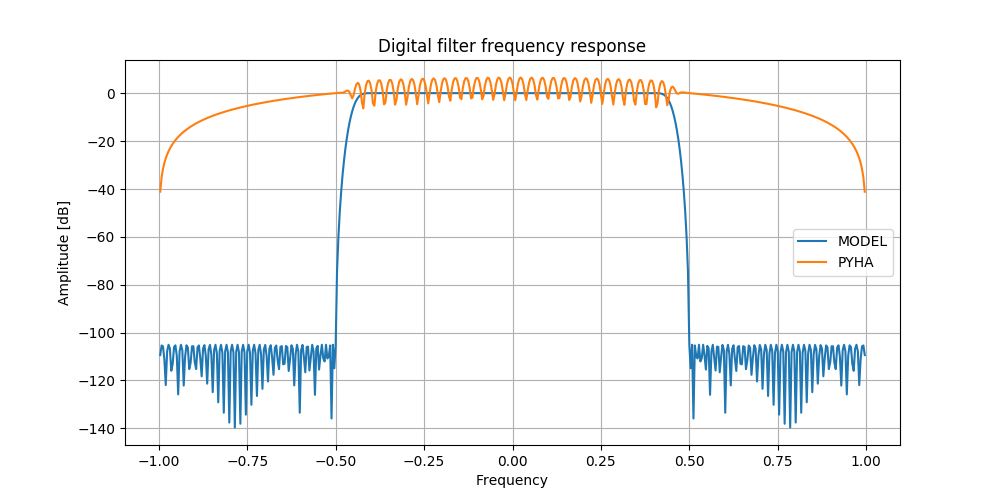

In [9]:
gain_fix = 512-128-16 # this is not 100% precise
plt.title('Digital filter frequency response')
plt.magnitude_spectrum(np.array(sims['MODEL']) * gain_fix, window=matplotlib.mlab.window_none, scale='dB', label='MODEL')
plt.magnitude_spectrum(np.array(sims['PYHA']) * gain_fix, window=matplotlib.mlab.window_none, scale='dB', label='PYHA')
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency')
plt.grid()
plt.legend()
plt.show()

In [ ]:
dut = ComplexFIR(taps)
with Sfix._float_mode:
    sims = simulate(dut, inp, simulations=['MODEL', 'PYHA'])

# Sine response

In [ ]:
fs = 256
t = np.linspace(0, 2, 2*fs)
s0 = np.exp(2 * np.pi * 2 * t * 1j) * 0.5
s1 = np.exp(2 * np.pi * 80 * t * 1j) * 0.5
inp = s0 + s1

plt.title('Input, time domain, real channel')
plt.plot(inp.real)
plt.grid(True)
plt.show()

plt.title('Input, frequency domain')
plt.magnitude_spectrum(inp, scale='dB')
plt.grid(True)
plt.show()

In [ ]:
dut = ComplexFIR(taps)
sims = simulate(dut, inp) # run all simulations
assert hardware_sims_equal(sims)

In [ ]:
plt.title('Output, time domain, real channel')
plt.plot(s0, label='Original')
plt.plot(np.array(sims['MODEL']).real, label='MODEL')
plt.plot(np.array(sims['PYHA']).real, label='PYHA')
plt.legend()
plt.grid()
plt.show()

plt.title('Output, frequency domain')
plt.magnitude_spectrum(sims['MODEL'], scale='dB', label='MODEL')
plt.magnitude_spectrum(sims['PYHA'], scale='dB', label='PYHA')
plt.legend()
plt.grid()
plt.show()

# Noise response

In [ ]:
np.random.seed(0)  # reproduce tests
inp = np.random.uniform(-1, 1, 512) + np.random.uniform(-1, 1, 512)*1j
inp *= 0.75

dut = ComplexFIR(taps)
sims = simulate(dut, inp) # run all simulations
assert hardware_sims_equal(sims)

In [ ]:
plt.title('Digital filter frequency response')
# plt.magnitude_spectrum(inp, scale='dB', label='MODEL')
plt.magnitude_spectrum(sims['MODEL'], scale='dB', label='MODEL')
plt.magnitude_spectrum(sims['PYHA'], scale='dB', label='PYHA')
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.plot(np.array(sims['MODEL']).real, label='MODEL')
plt.plot(np.array(sims['PYHA']).real, label='PYHA')
plt.grid(True)
plt.legend()
plt.show()